In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime 

Перед вами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней. И таблица с характеристиками рекламных клиентов (тех, кто разместил эти объявления).

In [60]:
ad = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-kireeva/shared/homeworks/python_ds_miniprojects/6/ads_data.csv', parse_dates=['date'])
ad_client = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-kireeva/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv', parse_dates=['create_date', 'date'])

In [58]:
ad.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [32]:
ad_client.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


1. Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. Тонкий момент: помните, что некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. Округлите ответы до целых чисел.

In [33]:
mid = ad.groupby(['ad_id', 'event'], as_index=False)\
            .agg({'client_union_id': 'count'})\
            .pivot(index='ad_id', columns='event', values='client_union_id')\
            .fillna(0)
mid

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,0.0,156.0
122023,0.0,68.0


In [34]:
mid.click.mean(), mid.view.mean()

(113.1378238341969, 923.1316062176165)

2. Давайте посмотрим на распределение показов объявлений!

По оси x – число показов

По оси y – доля объявлений с такими показами

Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения.

In [36]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [40]:
views = ad.query('event == "view"')
log = np.log(views.ad_id.value_counts())

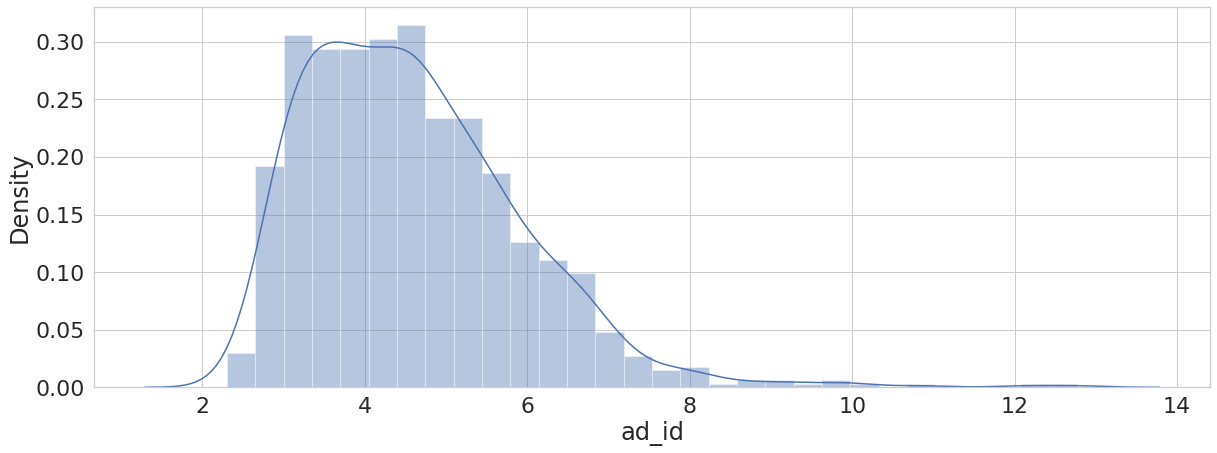

In [41]:
sns.distplot(log)

3. Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.

Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

In [48]:
daily_views = views.pivot_table(index='ad_id', columns='date', values='time', aggfunc='count')
daily_views

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN
...,...,...,...,...,...,...
122004,85.0,15.0,NaN,NaN,NaN,NaN
122013,NaN,NaN,NaN,134.0,22.0,NaN
122023,NaN,NaN,NaN,53.0,15.0,NaN


In [50]:
daily_mean = daily_views.mean()
daily_mean

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [54]:
dayly_rolling_mean = daily_views.mean().rolling(window=2).mean().round(0)
dayly_rolling_mean

date
2019-04-01      NaN
2019-04-02    146.0
2019-04-03    151.0
2019-04-04    420.0
2019-04-05    798.0
2019-04-06    598.0
dtype: float64

In [55]:
dayly_rolling_mean['2019-04-06']
    

598.0

4. Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd

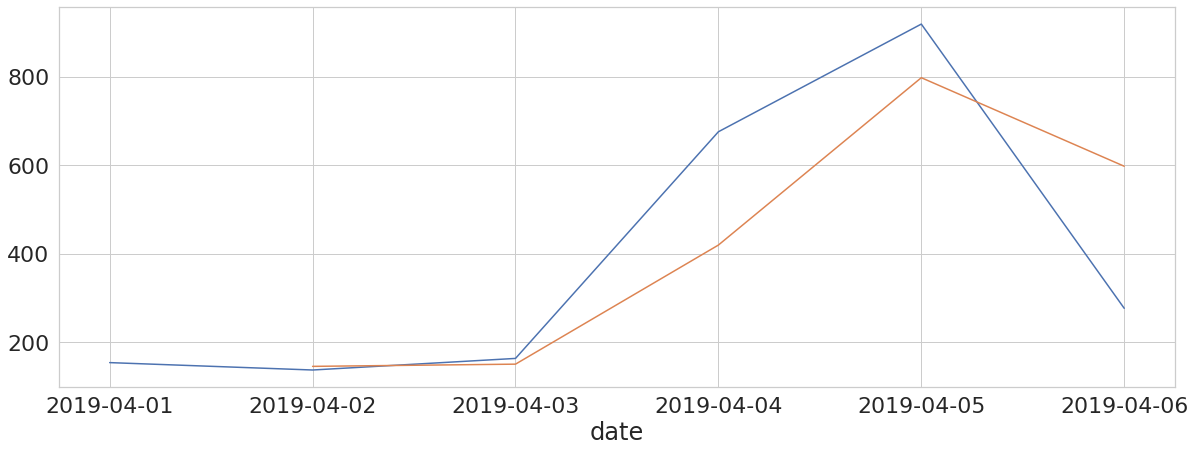

In [56]:
sns.lineplot(data=daily_mean)
sns.lineplot(data=dayly_rolling_mean)

5. Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).

В качестве ответа укажите среднее число дней.

In [70]:
full_data = pd.merge(ad, ad_client, on=['client_union_id'])
full_data['mid'] = full_data.date_x - full_data.create_date
first_ad = full_data.groupby('client_union_id')['mid'].min() #mid содержит разницу со всеми днями, а нас интересует только первый запуск, ищем минимальную разницу

In [71]:
first_ad

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Name: mid, Length: 838, dtype: timedelta64[ns]

In [73]:
first_ad.mean().days

124